<a href="https://colab.research.google.com/github/vvthakral/data-science-bootcamp/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [4]:
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


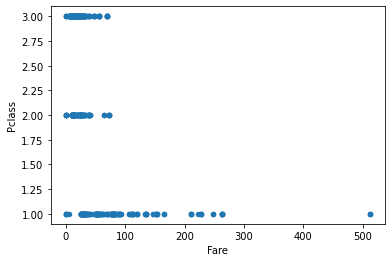

In [5]:
titanic.plot(x='Fare',y='Pclass',kind='scatter')

In [6]:
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers

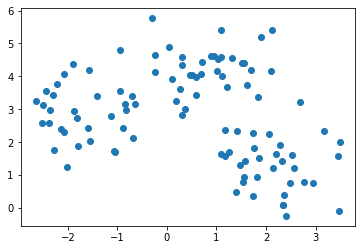

In [17]:
x, y = make_blobs(n_samples=100,centers=3,cluster_std=0.75,random_state=0)
plt.scatter(x[:,0],x[:,1])

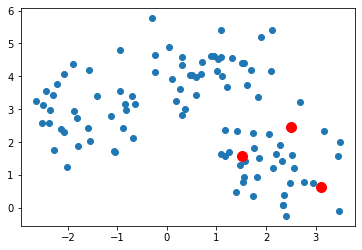

In [18]:
num_clusters = 3
c_head = np.zeros((num_clusters,2))
for i in range(num_clusters):
  c_head[i] = [np.random.uniform(x[:,0].min(),x[:,0].max()) for j in range(2)]#np.random.uniform(x[:,1].min(),x[:,1].max()))

plt.scatter(x[:,0],x[:,1])
plt.scatter(c_head[:,0],c_head[:,1],c='r',s=100)
plt.show()

In [10]:
c_map=[]
for p in (x):
  min_dist = 1000
  for index,i in enumerate(c_head):
    dist = np.sqrt((p[0]-i[0])**2+(p[1]-i[1])**2)
    if dist<min_dist:
      closest = index
      min_dist = dist
  c_map.append(closest)
print(c_map)
c_map = np.array(c_map)

[2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1]


In [11]:
c_map = np.array(c_map)
for i in range(len(c_head)):
  p_index = np.where(c_map==i)
  c_head[i][0] = x[p_index][:,0].sum()/len(p_index[0])
  c_head[i][1] = x[p_index][:,1].sum()/len(p_index[0])

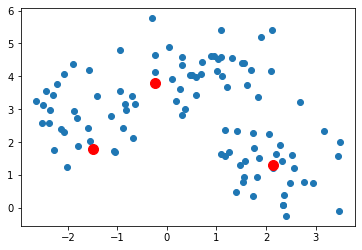

In [12]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(c_head[:,0],c_head[:,1],c='r',s=100)
plt.show()

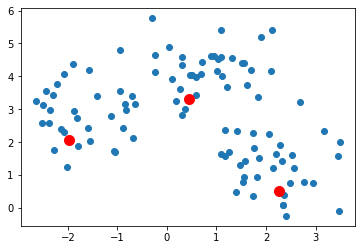

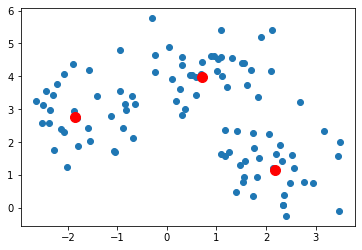

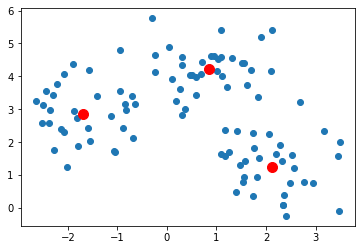

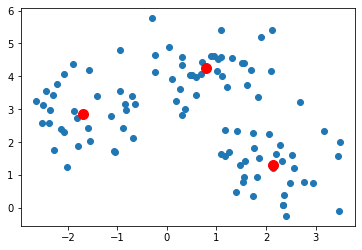

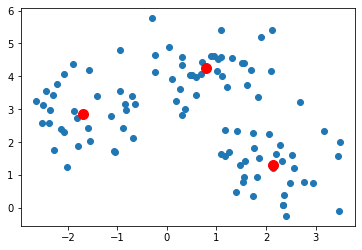

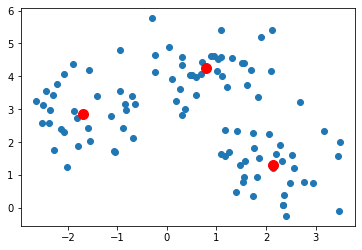

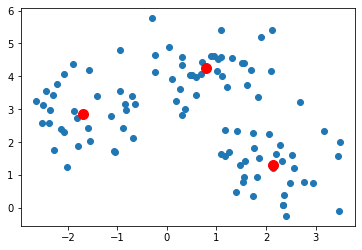

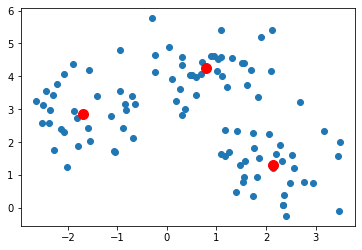

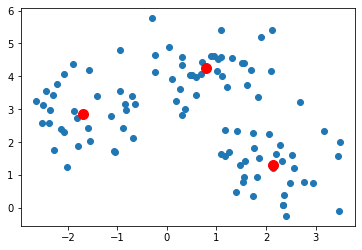

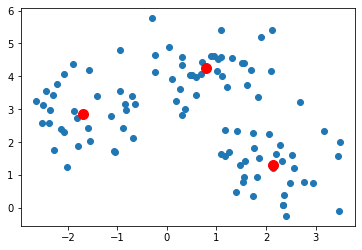

In [19]:
#Complete the function 
def k_means_iterate(num_clusters,p):
  num_clusters = 3
  c_head = np.zeros((num_clusters,2))
  for i in range(num_clusters):
    c_head[i] = [np.random.uniform(x[:,0].min(),x[:,0].max()) for j in range(2)]

  
  #write some iterator here
    c_map=[]
    for p in (x):
      min_dist = 1000
      for index,i in enumerate(c_head):
        dist = np.sqrt((p[0]-i[0])**2+(p[1]-i[1])**2)
        if dist<min_dist:
          closest = index
          min_dist = dist
      c_map.append(closest)
    c_map = np.array(c_map)

    c_map = np.array(c_map)
    for i in range(len(c_head)):
      p_index = np.where(c_map==i)
      c_head[i][0] = x[p_index][:,0].sum()/len(p_index[0])
      c_head[i][1] = x[p_index][:,1].sum()/len(p_index[0])
    
    plt.scatter(x[:,0],x[:,1])
    plt.scatter(c_head[:,0],c_head[:,1],c='r',s=100)
    plt.show()

k_means_iterate(3,x)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
y_km = kmeans.predict(x)

In [21]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (row

In [22]:
y_km

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0], dtype=int32)

In [23]:
kmeans.cluster_centers_

array([[-1.68343903,  2.83782543],
       [ 2.13478998,  1.29632096],
       [ 0.79232282,  4.25011573]])

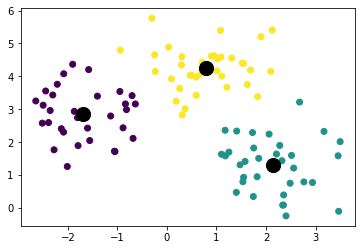

In [24]:
plt.scatter(x[:,0],x[:,1],c=y_km)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=200)
plt.show()

# Assignment

Use KMeans on the Fraud Detection Dataset at https://www.kaggle.com/mlg-ulb/creditcardfraud